In [14]:
import numpy as np
import matplotlib.pyplot as plt     
import scipy.stats as stats
import scipy.special as special
import seaborn as sns               
import pandas as pd                 # optional
import math

%matplotlib inline

In [15]:
# grant permission to student-game.py
!chmod +x student-game.py

In [16]:
# the implementation of the pub's rules for calculating fair odds
def probdist_beginner(X, sigma, mu_values):
    """ 
    Given an ndarray X_1..X_n, and a known sigma;
    and a list of the mu values in each column;
    return a list of the pub's inferred P(mu | X,sigma) for each column.
    """
    xbar = np.mean(X)
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= sigma / math.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def probdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the pub's inferred P(mu | X) for each column.
    """
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)     # note that numpy.std() by default calculates a population std dev; to get sample std. dev., set ddof=1
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= s / math.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

**Part 1:** The Beginner's Game

In [17]:
# define the set of mu values
mus = np.linspace(-100, 100, 21) 

Our goal is to find: $$P(\mu \mid x_1, \dots, x_n , \sigma^2)$$
We can derive this using Bayes theorem: 
$$P(\mu \mid x_1, \dots, x_n , \sigma^2) = \frac{P(x_1, \dots, x_n \mid \mu, \sigma^2) P(\mu \mid \sigma^2)}{P(x_1, \dots, x_n \mid \sigma^2)}$$

We can calculate: $$P(x_1, \dots, x_n \mid \mu, \sigma^2)$$
which is the likelihood term: $$exp(-\frac{n}{2} log(2 \pi \sigma^2) - \sum_{i=1}^{n} \frac{(x_i - \mu)^2}{2 \sigma^2})$$

And the denominator will be the normalization constant, or the sum of all of the posterior probabilities. Below is my function to calculate the posterior probability distribution for each of the 21 values of $\mu$ on that grid row.

In [18]:
# takes in observations array, a list of possible mus, and a value for sigma as input
def beginner(observations, mus, sigma):
    # initialize an empty list to store all of the posterior probabilities in 
    posteriors = []
    
    # number of observations
    n = len(observations)

    # prior probability of mu is uniform over 21 possible values of mu, so 1/21
    prob_mu = 1/21
    
    # iterate through each of the 21 possible values of mu 
    # calculate the posterior probability for each of the 21 possible values of on that grid row
    for mu in mus:
        # calculate log likelihood
        first_term = -n/2 * np.log(2*np.pi * np.square(sigma))

        second_term = 0
        for observation in observations:
            second_term += np.square(observation - mu) / (2*np.square(sigma))

        log_likelihood = first_term - second_term

        # calculate the likelihood from the above log likelihood
        likelihood = np.exp(log_likelihood)

        # calculate the numerator
        posterior_prob = likelihood * prob_mu

        posteriors.append(posterior_prob)

    # normalize values by dividing by marginal probability 
    marginal = np.sum(posteriors)
    posterior_probs = [p / marginal for p in posteriors]  # Normalize

    return posterior_probs

In [19]:
# given example for analysis
x = np.array([ 11.50, -2.32, 9.18]) # n=3 observations
true_sigma = 60.                             # Student also tells you this in beginner's game
true_mu    = -20.                            # the unknown column position, mu

In [20]:
# calculate our posterior distribution for the beginner's game
beginner_dist = beginner(x, mus, true_sigma)

# calculate the pub's posterior distribution for the beginner's game
pub_beginner = probdist_beginner(x, true_sigma, mus)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

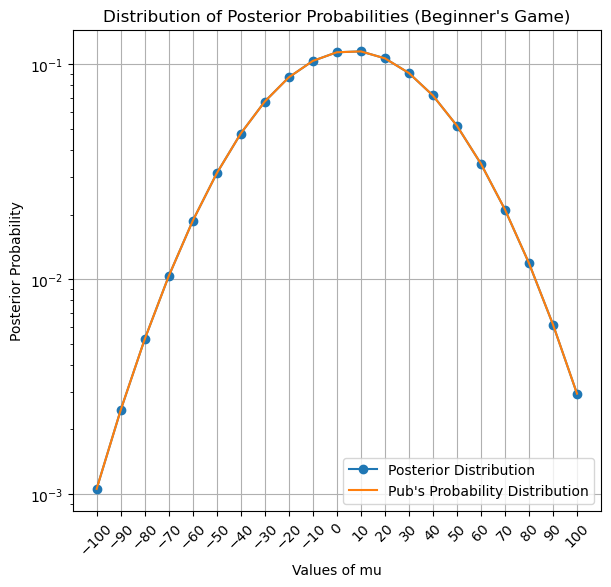

In [30]:
# plot both distributions on a semilog scale
plt.subplots_adjust(hspace=0.4)

# log y axis
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.4)

# 2 rows, 2 columns, first plot
plt.subplot(221)

# plot the calculated posterior probabilities ('example') on the y-axis and 't' on the x-axis
plt.semilogy(mus, beginner_dist, label="Posterior Distribution", marker = "o")
plt.semilogy(mus, pub_beginner, label="Pub's Probability Distribution")
plt.title('Distribution of Posterior Probabilities (Beginner\'s Game)')
plt.xlabel('Values of mu')
plt.ylabel('Posterior Probability')
plt.xticks(mus, rotation=45)
plt.grid(True)
plt.legend()

# show plot
plt.show

**Interpretation:** From the plot above, it appears that our calculated posterior distribution overlaps exactly with the pub's probability distribution; we can see that the blue dotted line (our calculation) overlaps with the orange line (pub's method). The Bayesian method and the pub's method returns very similar estimates, and we observe that this is happening when we know the exact $\sigma$ value (when we are given a $\sigma$ value).

**Part 2:** The Advanced Game

Below is my script for the advanced game, which takes in an array of observations  ($x_1...x_n$) and returns a 20x21 array of posterior probabilities.

In [22]:
# takes in observations array as input
def advanced(observations, sigmas, mus):
    # initialize an empty array to store all of the posterior probabilities in 
    posteriors = np.zeros((len(sigmas), len(mus)))
    
    # number of observations
    n = len(observations)

    # prior probability of mu is uniform over 21 possible values of mu, so 1/21
    prob_mu = 1/21
    
    # iterate through each of the 21 possible values of mu 
    # calculate the posterior probability for each of the 21 possible values of on that grid row
    
    for sigma_idx, sigma in enumerate(sigmas):
        for mu_idx, mu in enumerate(mus):
            # calculate log likelihood
            first_term = -n/2 * np.log(2*np.pi * np.square(sigma))
    
            second_term = 0
            for observation in observations:
                second_term += np.square(observation - mu) / (2*np.square(sigma))
    
            log_likelihood = first_term - second_term
    
            # calculate the likelihood from the above log likelihood
            likelihood = np.exp(log_likelihood)
    
            # calculate the numerator
            posterior_prob = likelihood * prob_mu
            
            # denominator is the normalization constant --> figure this out
            # denominator = 1 / np.sqrt(2 * np.pi * np.square(sigma))
    
            # posterior_prob = numerator / denominator
    
            posteriors[sigma_idx, mu_idx] = posterior_prob

    # calculate marginal distribution (sum over sigma axis, axis=1)
    marginal = np.sum(posteriors)

    # normalize the posteriors by dividing by the marginal
    normalized_posteriors = posteriors / marginal  # Normalize
    normalized_posteriors = normalized_posteriors[::-1, :] # -> my original matrix of normalized posteriors was flipped 
                                                           # due to how I calculated it!

    # marginal distribution for mu (sum over the sigma axis)
    marginal_mu_dist = np.sum(normalized_posteriors, axis=0)

    # return both normalized posteriors and marginal mu distribution
    return normalized_posteriors, marginal_mu_dist

In [23]:
# define the set of sigma values
sigmas = np.linspace(5, 100, 20)

# define the set of mu values
mus = np.linspace(-100, 100, 21)

In [24]:
# our calculated probability distribution for the advanced game
advanced_posteriors, advanced_dist = advanced(x, sigmas, mus)

# calculate the pub's calculated probability distribution for the advanced game
pub_advanced = probdist_advanced(x, mus)

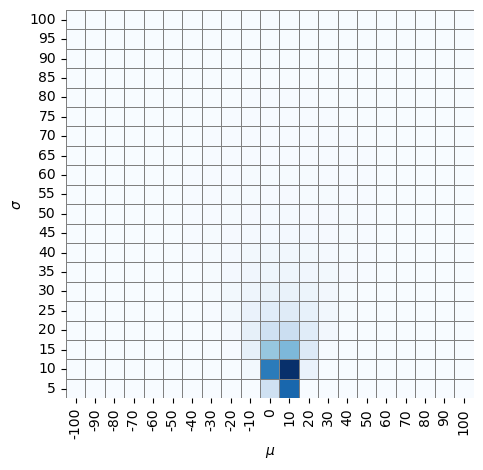

In [25]:
# Heat map of the 20x21 posterior distribution
# Set up the x and y coords
gridrows = np.linspace( 100.0,   5.0, 20)   # rows of the board: std. dev., sigma
gridcols = np.linspace(-100.,  100.0, 21)   # cols of the board: mean (location), mu
nrows    = len(gridrows)
ncols    = len(gridcols)

# Format axis labels as strings, with values as "10" not "10.0" for clarity, space
xlabels = [ "{0:.0f}".format(val) for val in gridcols ]
ylabels = [ "{0:.0f}".format(val) for val in gridrows ]

# the Seaborn "heatmap" plot
# with some examples of how it can be customized.
fig, ax = plt.subplots()
sns.heatmap(advanced_posteriors,  # takes a 2D array of data
            ax=ax,
            xticklabels=xlabels,  #   ... set custom x axis labels
            yticklabels=ylabels,  #   ... set custom y axis labels
            cbar=False,           #   ... turn off the default color scale bar
            square=True,          #   ... force the plot to be square
            linecolor='grey',     #   ... set grid line color
            linewidth=0.5,        #   ... set grid line width
            cmap='Blues')         #   ... set the heat map color scheme ('color map', cmap) 

ax.set(xlabel=r'$\mu$',                # ...set X axis label, using LaTeX formatting
       ylabel=r'$\sigma$')             # ...and Y axis label
for label in ax.get_yticklabels():    
    label.set_size(10)                 # ... and font size on y-axis tick labels
for label in ax.get_xticklabels():    
    label.set_size(10)                 # ... and on x-axis tick labels

# Finally, we save the whole Figure to a file.
fig.set_tight_layout(True)

plt.colorbar

plt.show()

<Figure size 640x480 with 0 Axes>

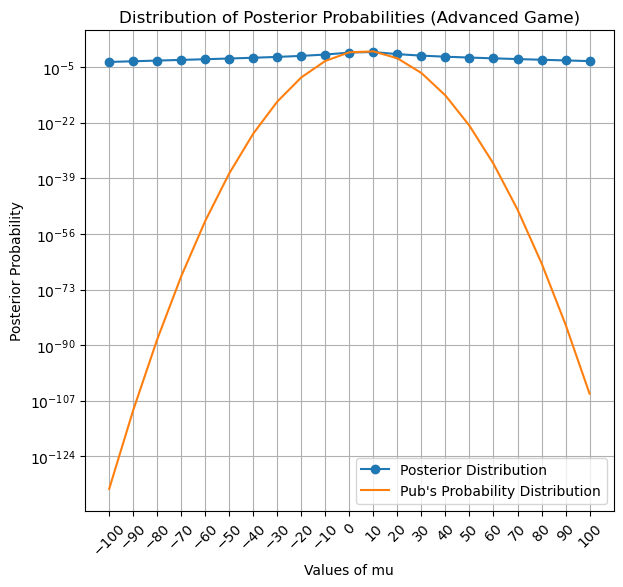

In [31]:
# plot both distributions on a semilog scale
plt.subplots_adjust(hspace=0.4)

# log y axis
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.4)

# 2 rows, 2 columns, first plot
plt.subplot(221)

# plot the calculated posterior probabilities ('example') on the y-axis and 't' on the x-axis
plt.semilogy(mus, advanced_dist, label="Posterior Distribution", marker = "o")
plt.semilogy(mus, pub_advanced, label="Pub's Probability Distribution")
plt.title('Distribution of Posterior Probabilities (Advanced Game)')
plt.xlabel('Values of mu')
plt.ylabel('Posterior Probability')
plt.xticks(mus, rotation=45)
plt.grid(True)
plt.legend()

# show plot
plt.show()

**Interpretation:** From the plot above, we can see that our calculated marginal distribution (blue, dotted line) and the pub's probability distribution (orange line) predict the same value of $\mu$ to be the most likely to generate the greatest posterior probability or the greatest probability, respectively. However, we also observe that our curve for the calculated posterior probability indicates that the posterior probability for other values of $\mu$ are similar to that of $\mu = 10$, since this curve is quite flat/even across the range of values of $\mu$. On the other hand, the pub's probability distribution is parabola shaped, indicating that it could be underestimating the probability of other values of $\mu$.

**Part 3:** Where's the advantage? Is the pub calculating its odds correctly? Where do you see an advantage? (i.e. why is there a difference, and how could you take advantage of this difference in betting?)

**Answer:** Based on the graph from question 1 (the graph of the calculated posterior probability distribution vs. the pub's probability distribution for the beginner's game) we can see that $\mu$, or the mean ($\bar{x}$) is a sufficient statistic when you are given a value for $\sigma$; this is evident through the overlapping distributions. 

Based on the advanced game's method of calculating posterior probability, the graph indicates that $\mu = 10$ is the most likely to generate the greatest posterior probability; however, as explained in the interpretation from question 2, the pub's strategy vastly underestimates the probability of other $\mu$ values in comparison to our calculated posterior probability distribution. The pub's prediction and the Bayesian prediction (our calculation) are very different.

The pub is not calculating its odds correctly -- it is not integrating over all possible values of $\sigma$, or it is not integrating over all possible values for standard deviation; the pub's method assumes they can use the same, sample standard deviation for every value of $\mu$ tested. Thus, the "real" standard deviation could be very far off from the sample standard deviation, which aligns with this idea that the pub is underestimating the probabilities for the extreme values of $\mu$.

The pub's strategy is to take the observations as input and find the $\mu$ value based on those observations. When we have very few observations, the pub trusts these few observations "too much" -- it is overconfident of its limited observationss. As we can see in the given examle with three observations, the pub's estimation of the mean is 10, but the actual $\mu$ is much lower, at -20. This is indicative that it might not count for variance in data. Our strategy is much better, because it contains the information that the three observations doesn't tell us by iterating through the values of $\sigma$ as well. 

Therefore, we could take advantage of the pub's "faulty" method of calculating probability by betting at the tails of the distribution, or bet at the extremes; this is because the pub underestimates the likelihood of these extremes. This is because the odds at the extremes are higher than the pub predicts them to be (especially when there are fewer observations), and most other people will not be betting at the extremes. If you bet somewhere far from the mean, you might earn more money and the pub would lose money. This is especially the case when there are fewer observations, since most people will bet near the estimated mean.

In [32]:
%load_ext watermark
%watermark -v -m -p numpy,matplotlib,seaborn,pandas,jupyter,scipy,math

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.27.0

numpy     : 2.1.1
matplotlib: 3.9.2
seaborn   : 0.13.2
pandas    : 2.2.2
jupyter   : 1.1.1
scipy     : 1.14.1
math      : unknown

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

